In [1]:
# imports
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import pandas as pd

# getting the dataset
path = "."
filename = os.path.join(path, "data/churn_modelling.csv")
df = pd.read_csv(filename, na_values=['NA', '?'])
df = df.drop(['Geography', 'Gender'], axis=1)

tdf = df[0:999]

In [2]:
Y = pd.DataFrame(df, columns=['Exited'])
X = df.drop(['Surname', 'Exited'], axis=1)

testY = pd.DataFrame(tdf, columns=['Exited'])
testX = tdf.drop(['Surname', 'Exited'], axis=1)

In [3]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X, Y)
NB_pred = clf_NB.predict(testX)

print('Accuracy on NB test data is %.2f' % (accuracy_score(testY, NB_pred)))

Accuracy on NB test data is 0.78


d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'Accuracy')

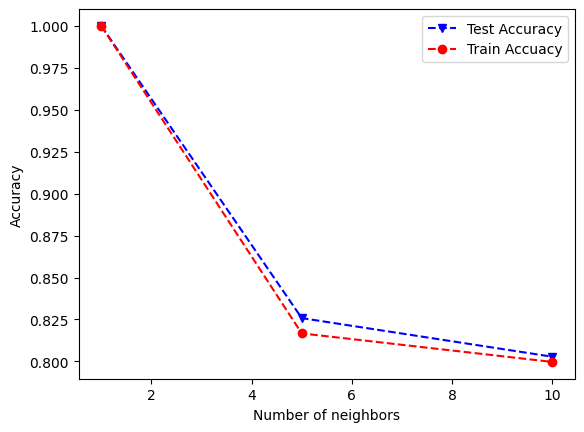

In [4]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X, Y)
    knn_pred = clf.predict(testX)
    knn_pred_train = clf.predict(X)
    testAcc.append(accuracy_score(testY, knn_pred))
    trainAcc.append(accuracy_score(Y, knn_pred_train))

plt.plot(numNeighbors, testAcc, 'bv--', numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [5]:
print('Accuracy on KNN test data is %.2f' % (accuracy_score(testY, knn_pred)))

Accuracy on KNN test data is 0.80


In [6]:
# Support Vector Machines
from sklearn.svm import SVC

C = [0.1, 0.25, 0.5, 1, 3, 5]

SVMLtestAcc = []
SVMLtrainAcc = []

# test different values of C
for param in C:
    # we are using a linear kernel here
    clf = SVC(C=param, kernel='linear')
    # fit the model to the training data
    clf.fit(X, Y)
    # predict the test data using the model we just fit
    svml_pred = clf.predict(testX)
    # predict the training data using the model we just fit
    svml_pred_train = clf.predict(X)
    # append the accuracy score to the list
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    # append the accuracy score to the list
    SVMLtrainAcc.append(accuracy_score(Y, svml_pred_train))

d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [7]:
print('Accuracy on SVM test data is %.2f' % (accuracy_score(testY, svml_pred)))

Accuracy on SVM test data is 0.80


In [8]:
# Decision Tree'se
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

In [9]:
# Adding graphviz to help graph the tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

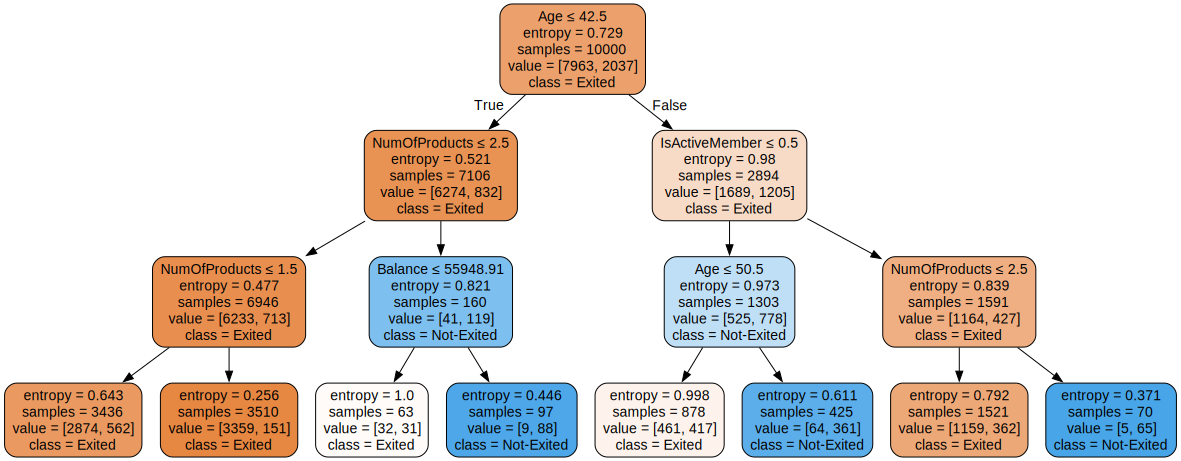

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['Exited', 'Not-Exited'],
                                filled=True, rounded=True,
                                special_characters=True)
dt_graph = graphviz.Source(dot_data)
dt_graph

In [11]:
predY = clf.predict(testX)

print('Accuracy on Decision Tree test data is %.2f' %
      (accuracy_score(testY, predY)))

Accuracy on Decision Tree test data is 0.84


In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X, Y)
    log_reg_pred = clf.predict(testX)
    log_reg_pred_train = clf.predict(X)
    LRtestAcc.append(accuracy_score(testY, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y, log_reg_pred_train))

d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\repo\csc177-group-project\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Accuracy')

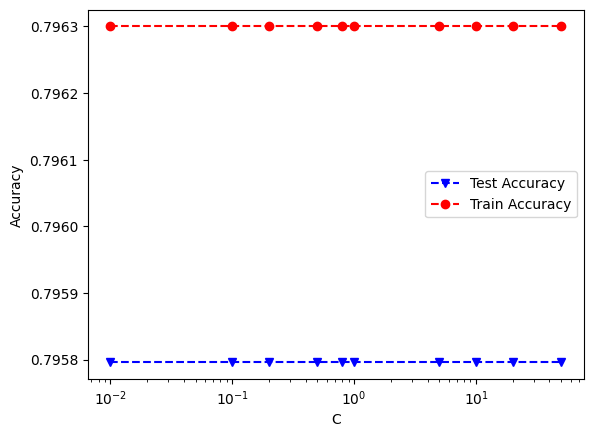

In [13]:
plt.plot(C, LRtestAcc, 'bv--', C, LRtrainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

In [14]:
print('Accuracy on Logistic Regression test data is %.2f' %
      (accuracy_score(testY, log_reg_pred))
      )

Accuracy on Logistic Regression test data is 0.80
